# Text Analysis for Digital Humanities - Project

This notebook is meant to help you with your own project. Just change the file path below so that it points to the text you want to analyze.

In [4]:
%pip install nltk
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tomvannuenen/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tomvannuenen/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/tomvannuenen/nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tomvannuenen/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Import Data

Change the `file_path` variable below to a text you are interested in exploring.

In [3]:
file_path = 'data/1895_wilde-oscar_the-importance-of-being-earnest.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

# things to do with NLTK Text objects

Concordance for input word:
Displaying 25 of 51 matches:
 always pretended to have a younger brother of the name of Ernest , who lives i
have invented a very useful younger brother called Ernest , in order that you m
 accepts me , I am going to kill my brother , indeed I think I 'll kill him in 
en propose for practice . I know my brother Gerald does . All my girl-friends t
nsense . Algernon : What about your brother ? What about the profligate Ernest 
! Jack : Very well , then . My poor brother Ernest was carried off suddenly , i
le too much interested in your poor brother Ernest ? Wo n't she feel his loss a
ts , that unfortunate young man his brother seems to be . But I must not distur
4 , The Albany , W. ' Uncle Jack 's brother ! Did you tell him Mr. Worthing was
 from your card , are Uncle Jack 's brother , my cousin Ernest , my wicked cous
 some terrible calamity ? Jack : My brother . Miss Prism : More shameful debts 
ack : [ -- ] Dead ! Chasuble : Your brother Ernest dead ? Jack 

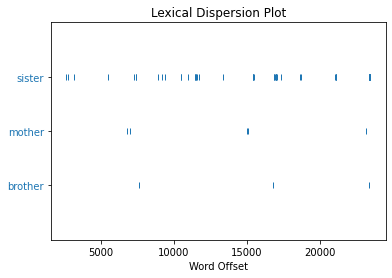

In [6]:
from nltk.text import Text
from nltk.tokenize import word_tokenize

# Assuming 'text' is your corpus as a single string
# Tokenize the corpus
tokens = word_tokenize(text)
# Create an NLTK Text object
nltk_text = Text(tokens)

# Example operations:
# 1. Concordance
print("Concordance for input word:")
nltk_text.concordance('brother')

# 2. Similar
print("\nWords similar to input word:")
nltk_text.similar('brother')

# 3. Common Contexts
print("\nCommon contexts of input words:")
nltk_text.common_contexts(['brother', 'sister'])

# 4. Collocations
print("\nCollocations in the text:")
nltk_text.collocations()

# 5. Dispersion Plot
print("\nDispersion plot for input words:")
nltk_text.dispersion_plot(['brother', 'mother', 'sister'])

# POS Tagging

# Comparative stylometry using TF-IDF

In [30]:
from nltk.corpus import gutenberg
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

**TF-IDF**: Term frequency, adjusted for inverse document frequency. 
 - Term frequency: the frequency with which words occur in your text
 - Inverse document frequency: the freq. with which words occur in your corpus. 
 
Or, a fancy way of getting distinguishing words of a document. At the moment, we'll be using the TfidfVectorizer, but we'll be turning off IDF, and just using it to make tables of word frequencies. 

Let's test it out on the NLTK's built-in `gutenberg` corpus of about 20 novels: 

In [7]:
tfidf = TfidfVectorizer(use_idf=False, max_features=800)

In [8]:
tf = tfidf.fit_transform([whitmanRaw, hamletRaw])

In [9]:
tf

<2x800 sparse matrix of type '<class 'numpy.float64'>'
	with 1294 stored elements in Compressed Sparse Row format>

**Sparse matrix**: Matrix (table) with some values missing    
**Dense matrix**: That matrix filled in (think: fillna(0)). 

In [10]:
tfDense = tf.todense()

In [11]:
labels = tfidf.get_feature_names()

In [12]:
labels[658:670]

['sure',
 'surely',
 'swear',
 'sweet',
 'swift',
 'swiftly',
 'sword',
 'take',
 'talk',
 'tears',
 'teeming',
 'tell']

In [13]:
whDF = pd.DataFrame(tfDense, index=['Whitman', 'Hamlet'], 
                    columns=labels)

In [14]:
whDF

,about,above,advance,after,again,againe,against,age,ages,ah,...,year,years,yellow,yet,you,young,your,yours,yourself,youth
Whitman,0.002465,0.002689,0.001867,0.009860,0.011877,0.000000,0.002540,0.003585,0.002764,0.002390,...,0.003287,0.007619,0.00239,0.019571,0.114810,0.008814,0.027265,0.001270,0.00381,0.002465
Hamlet,0.008253,0.000000,0.000000,0.005647,0.000000,0.014768,0.008687,0.003475,0.000000,0.000869,...,0.000000,0.000434,0.00000,0.016071,0.228902,0.003909,0.109890,0.002606,0.00000,0.006081


Now we'll try again, but with all the texts. First, we instantiate our vectorizer, giving it all the options we want.

In [16]:
tfidf = TfidfVectorizer(use_idf=False, max_features=800)

Next, convert our list of texts to a matrix of word frequencies: 

In [17]:
allTf = tfidf.fit_transform(allRaw)

What does it look like? 

In [18]:
allTf

<18x800 sparse matrix of type '<class 'numpy.float64'>'
	with 11276 stored elements in Compressed Sparse Row format>

Since it's a sparse matrix, we have to convert it to a dense matrix for Pandas to understand it: 

In [19]:
allTfDense = allTf.todense()

Here's a better list of labels: 

In [20]:
allTextLabels = [text.split('.')[0] for text in gutenberg.fileids()]
allTextLabels[:3]

['austen-emma', 'austen-persuasion', 'austen-sense']

Now get the word labels: 

In [21]:
allWordLabels = tfidf.get_feature_names()

Now put it all in a Pandas DataFrame, along with the labels: 

In [22]:
allDf = pd.DataFrame(allTfDense, index=allTextLabels, columns=allWordLabels)
allDf

,10,11,12,13,14,15,16,17,18,19,...,ye,yea,year,years,yes,yet,you,young,your,yourself
austen-emma,0.000147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000515,0.000000,0.002060,0.004193,0.009196,0.008019,0.145660,0.014125,0.026778,0.004120
austen-persuasion,0.000134,0.000134,0.000134,0.000134,0.000134,0.000269,0.000269,0.000134,0.000134,0.000134,...,0.000269,0.000000,0.003627,0.007791,0.006448,0.007791,0.084362,0.011284,0.016657,0.001881
austen-sense,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,...,0.000096,0.000000,0.005198,0.004717,0.005872,0.007509,0.114655,0.009916,0.037159,0.003658
bible-kjv,0.021160,0.021000,0.019671,0.019041,0.018651,0.017932,0.016902,0.015053,0.016003,0.015143,...,0.039812,0.003398,0.003688,0.005388,0.000040,0.006827,0.026158,0.002999,0.017842,0.000000
blake-poems,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.007529,0.000000,0.000000,0.007529,0.013552,0.001506,0.016564,0.000000
bryant-stories,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001809,0.000201,0.001407,0.004423,0.005629,0.002011,0.092885,0.003016,0.017491,0.000603
burgess-busterbrown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000664,0.001992,0.006640,0.001992,0.075034,0.001992,0.004648,0.001992
carroll-alice,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000383,0.000000,0.000767,0.000383,0.004984,0.009584,0.157565,0.001917,0.023769,0.003834
chesterton-ball,0.000131,0.000131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000653,0.000131,0.001698,0.001829,0.008882,0.008751,0.139233,0.006139,0.025339,0.001045
chesterton-brown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000875,0.002479,0.004521,0.009771,0.100923,0.006417,0.013272,0.001458


# Stylometry

Stylometry is the "measurement of style." It's a way to show how the style of writers is similar or different. Style, in this case, deals with the 800 most frequent words, which are function words, rather than content words—they show not what 

Or, comparison of most frequent words. 

In [23]:
tfidf = TfidfVectorizer(use_idf=False, max_features=800)

In [24]:
allTf = tfidf.fit_transform(allRaw).todense()

In [25]:
allTf.shape

(18, 800)

In [26]:
pca = PCA(2)

In [27]:
pcaOut = pca.fit_transform(allTf)

In [28]:
pcaOut

array([[ 0.32333505, -0.08381139],
       [ 0.22136693, -0.1140211 ],
       [ 0.29950241, -0.07478352],
       [-0.2457221 ,  0.08488495],
       [-0.26052024,  0.09992633],
       [-0.13392442, -0.14444047],
       [ 0.10127414, -0.23486152],
       [ 0.0123094 , -0.16840572],
       [-0.10519774, -0.09191935],
       [-0.12196108, -0.14224833],
       [-0.120221  , -0.11867094],
       [ 0.13612398, -0.07050656],
       [-0.16890033, -0.04802805],
       [-0.0279306 ,  0.16799588],
       [ 0.16958361,  0.31548159],
       [ 0.14650093,  0.29245297],
       [ 0.05878538,  0.26462148],
       [-0.28440432,  0.06633375]])

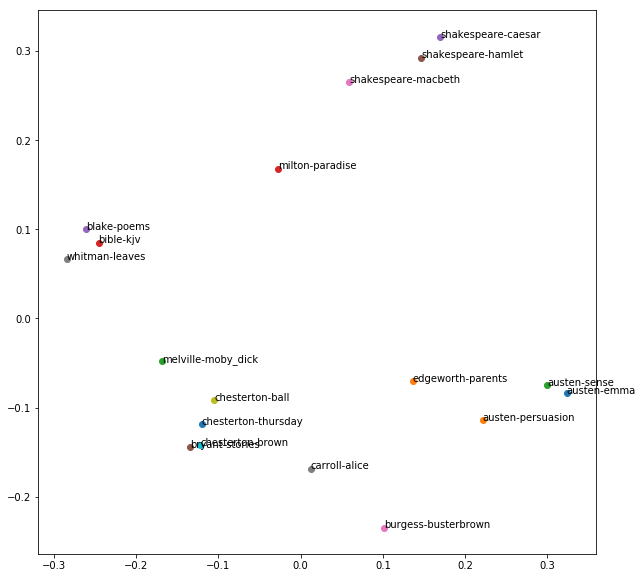

In [31]:
xs, ys = pcaOut[:,0], pcaOut[:,1]
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i])
    plt.annotate(allTextLabels[i], (xs[i], ys[i]))

# Topic Modeling

Topic modeling is the umbrella term for several statistical methods that show coocurrences of groups of words irrespective of their positions in the text. These groups, or "topics," are computationally inferred probabilistically, not semantically, and so even though they are called topics, they don't always correspond to what we would consider a topic. 

A good, general-purpose introduction to topic modeling [can be found here](http://www.cs.columbia.edu/~blei/papers/Blei2012.pdf) via David Blei's website.

Topic modeling is very sensitive to lots of factors. First, it works best on many documents rather than just a few, since a topic is defined as that which is distributed across documents. So it's a good idea to break a text into equal-sized chunks, first. 

I'll start by defining a `chunk()` function to do that, to break up a text into equal-sized chunks of about 500 words each. 

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
from more_itertools import chunked
from nltk import word_tokenize
from nltk.corpus import brown
import pyLDAvis.sklearn 
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
def chunk(tokens, size): 
    return list(zip(*[tokens[i::size] for i in range(size)])) 

In [3]:
moonstone = open('../moonstone.md').read()

In [4]:
moonstoneParts = moonstone.split('%%%%%')

In [5]:
moonstoneTokens = word_tokenize(moonstone)

In [6]:
moonstoneChunks = chunk(moonstoneTokens, 300)

Now I'll join the words together, to make strings again. 

In [7]:
moonstoneChunks = [' '.join(chunk) for chunk in moonstoneChunks]

Sanity check: how many chunks do we have? 

In [8]:
len(moonstoneChunks)

780

And what is the length (in characters) of each one? 

In [9]:
[len(chunk) for chunk in moonstoneChunks[:10]]

[1575, 1580, 1595, 1544, 1451, 1388, 1335, 1459, 1400, 1440]

Now we'll use a CountVectorizer instead of the TfidfVectorizer, to get word counts, rather than frequencies (LDA works best on counts). We'll say that we only want to see words that appear in at least 5% of documents, and in no more than 80% of documents. We'll also ignore stopwords while we're at it ("a," "the," "of," etc.). 

In [10]:
cv = CountVectorizer(min_df=2, max_df=0.95, stop_words='english')

Fit our model and transform our chunks into counts: 

In [11]:
counts = cv.fit_transform(moonstoneChunks)

In [12]:
counts

<780x5111 sparse matrix of type '<class 'numpy.int64'>'
	with 62923 stored elements in Compressed Sparse Row format>

Now we can get a list of all the words used here. Let's also peek at them, so that we know we're using content words, and not function words: 

In [13]:
wordLabels = cv.get_feature_names()

In [14]:
wordLabels[200:210]

['apartments',
 'aperture',
 'apologies',
 'apologise',
 'apology',
 'apparently',
 'apparition',
 'appeal',
 'appealed',
 'appealing']

Looks OK. Initialize our LDA engine: 

In [15]:
lda = LatentDirichletAllocation(n_topics=5, learning_method='online')

And do the topic modeling itself: 

In [16]:
ldaOut = lda.fit_transform(counts)

In [17]:
ldaOut.shape

(780, 5)

In [18]:
ldaOut

array([[ 0.00193757,  0.00195848,  0.00189769,  0.99224762,  0.00195865],
       [ 0.60464474,  0.17453547,  0.00195878,  0.00197358,  0.21688743],
       [ 0.59462853,  0.00192499,  0.0018737 ,  0.00189827,  0.39967451],
       ..., 
       [ 0.00190104,  0.00189753,  0.00188777,  0.0018994 ,  0.99241426],
       [ 0.00211896,  0.00212599,  0.00210611,  0.00211984,  0.99152911],
       [ 0.00205859,  0.00205523,  0.00204111,  0.00205524,  0.99178984]])

Now we can print the results from our model's `.components_` property: 

In [22]:
topicLabels = []
for i, topic in enumerate(lda.components_):
    print("Topic {}".format(i))
    topicLabel = " ".join([wordLabels[i] for i in topic.argsort()[:-10 - 1:-1]])
    print(topicLabel)
    topicLabels.append(topicLabel)

Topic 0
hindoo kattiawar time called north sacred wild india quicksand century
Topic 1
mr said franklin time sergeant miss rachel room house say
Topic 2
property mothers tract small committee clothes books mission societies dear
Topic 3
mr day place miss blake luker godfrey way know franklin
Topic 4
indians men time shrine ship steamer left people place mr


...or we can import this into a Pandas DataFrame so we can see how these topics show up in narrative time: 

In [25]:
df = pd.DataFrame(ldaOut, columns=topicLabels)

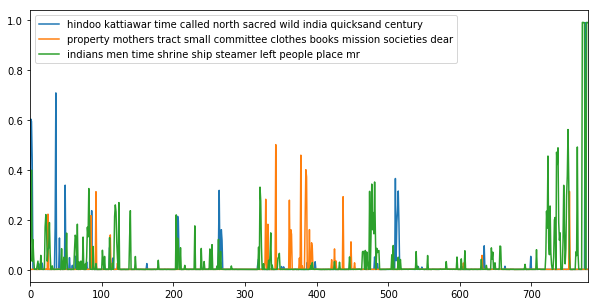

In [40]:
df[[topicLabels[0], topicLabels[2], topicLabels[4]]].plot()

Let's do the same thing again, but tweak the parameters a bit, and put it all into a function, so that it'll be easily reproducible.

In [71]:
def topicModel(docs, numTopics=8, numWords=8, maxFeats=None): 
    cv = CountVectorizer(stop_words='english', 
                         min_df=0.1, max_df=0.9, max_features=maxFeats)
    counts = cv.fit_transform(docs)
    wordLabels = cv.get_feature_names()
    lda = LatentDirichletAllocation(n_topics=numTopics, max_iter=10, 
                                    learning_method='online',
                                    learning_offset=50., random_state=0)
    lda.fit_transform(counts)
    for i, topic in enumerate(lda.components_):
        print("Topic {}".format(i))
        print(" ".join([wordLabels[i] for i in topic.argsort()[:-numWords - 1:-1]]))
    return lda, counts, cv

And let's try the same thing, but with the Brown corpus category "news," which will work a little better for topic modeling: 

In [72]:
newsWords = list(brown.words(categories='news'))

In [73]:
len(newsWords)

100554

In [74]:
type(newsWords)

list

In [75]:
chunks = [' '.join(chunk) for chunk in chunk(newsWords, 400)]

In [76]:
len(chunks)

251

In [77]:
[len(c) for c in chunks[:10]]

[2282, 2329, 2110, 2274, 2216, 2209, 2203, 2184, 2176, 2154]

In [78]:
lda, counts, cv = topicModel(chunks)

Topic 0
mrs said mr 000 board year school committee
Topic 1
new president year kennedy administration government states united
Topic 2
second months run 1961 center 12 long city
Topic 3
mrs family home mr members club week new
Topic 4
league new york club home year game national
Topic 5
month american new old man time set years
Topic 6
said home city year day time week court
Topic 7
state university school education county new high people


We can even use a visualization tool to visualize this in Jupyter. (To run this, you must first install pyLDAvis. You can usually get this by running `conda install pyldavis` in the terminal.)

In [79]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda, counts, cv, mds='tsne')
panel

PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
6      28.376866        1       1  764.074889  350.375676
1      23.942521        1       2    1.538880  -30.407273
0      21.495998        1       3  -87.205906  350.301339
7       7.345719        1       4 -295.175121  117.755331
3       5.518297        1       5 -231.707041 -250.371747
5       4.958727        1       6  255.007344 -186.690159
4       4.720433        1       7 -627.652849 -452.531498
2       3.641439        1       8  225.707531  168.449716, topic_info=     Category        Freq        Term       Total  loglift  logprob
term                                                               
89    Default  226.000000         mrs  226.000000  30.0000  30.0000
118   Default  156.000000       state  156.000000  29.0000  29.0000
92    Default  236.000000         new  236.000000  28.0000  28.0000
128   Default   79.000000  university   79.000000  27.0000  27.0000
42    Default   55.000000      family   55.000000  26.0000  26.0000
68    Default   48.000000      league   48.000000  25.0000  25.0000
112   Default   94.000000      school   94.000000  24.0000  24.0000
58    Default  131.000000        home  131.000000  23.0000  23.0000
86    Default   41.000000       month   41.000000  22.0000  22.0000
39    Default   50.000000   education   50.000000  21.0000  21.0000
142   Default   58.000000        york   58.000000  20.0000  20.0000
29    Default   59.000000        club   59.000000  19.0000  19.0000
47    Default   59.000000        game   59.000000  18.0000  18.0000
109   Default   50.000000         run   50.000000  17.0000  17.0000
87    Default   44.000000      months   44.000000  16.0000  16.0000
88    Default  157.000000          mr  157.000000  15.0000  15.0000
113   Default   44.000000      second   44.000000  14.0000  14.0000
12    Default   72.000000    american   72.000000  13.0000  13.0000
5     Default   45.000000        1961   45.000000  12.0000  12.0000
25    Default   41.000000      center   41.000000  11.0000  11.0000
104   Default  160.000000   president  160.000000  10.0000  10.0000
96    Default   63.000000         old   63.000000   9.0000   9.0000
3     Default   38.000000          12   38.000000   8.0000   8.0000
34    Default   66.000000      county   66.000000   7.0000   7.0000
4     Default   45.000000        1960   45.000000   6.0000   6.0000
73    Default   57.000000        long   57.000000   5.0000   5.0000
139   Default  204.000000        year  204.000000   4.0000   4.0000
122   Default  111.000000        time  111.000000   3.0000   3.0000
28    Default   93.000000        city   93.000000   2.0000   2.0000
78    Default   41.000000       march   41.000000   1.0000   1.0000
...       ...         ...         ...         ...      ...      ...
73     Topic8    7.679896        long   57.520330   1.2993  -3.7085
68     Topic8    5.327338      league   48.447510   1.1052  -4.0742
47     Topic8    5.815276        game   59.396797   0.9890  -3.9866
23     Topic8    3.996299        came   41.660962   0.9686  -4.3617
129    Topic8    3.113074         use   34.115611   0.9186  -4.6115
70     Topic8    4.556115        like   52.110943   0.8759  -4.2306
55     Topic8    3.718800        held   43.853723   0.8453  -4.4337
71     Topic8    3.360162      little   40.517989   0.8230  -4.5351
28     Topic8    7.340877        city   93.913423   0.7639  -3.7536
121    Topic8    2.397356       taken   31.036943   0.7520  -4.8727
85     Topic8    2.547714       money   33.189401   0.7458  -4.8119
93     Topic8    4.739302       night   65.324751   0.6893  -4.1912
57     Topic8    3.155189         hit   43.563880   0.6876  -4.5980
101    Topic8    2.988960        play   42.239035   0.6644  -4.6521
8      Topic8    2.917797          30   42.096322   0.6437  -4.6762
123    Topic8    3.910595       today   59.767680   0.5860  -4.3834
30     Topic8    2.177364        come   33.86

# Named Entiry Recognition Using SpaCy

SpaCy is a natural language processing library, similar to the NLTK in some respects, but with many notable differences. 
 - Where the NLTK is meant for teaching and learning natural language processing, SpaCy is designed for industrial applications (i.e. designed for speed and accuracy, not necessarily ease-of-use). 
 - Instead of performing each function separately (`word_tokenize`, `pos_tag`, `lemmatize`), SpaCy does everything all at once. This has advantages and disadvantages. For example, processing with SpaCy takes a long time. But once a text is processed, no further processing is necessary—it just becomes a matter of accessing the data that's already there. 
 - Because SpaCy stores a *lot* of data about each text, this can easily lead to memory overflow errors. An easy way around this is to break the text up into individual parts, and to use functions wherever possible, to limit the amount of data stored in memory. It helps if you have a computer with a lot of RAM. You can also randomly sample chunks of text (like 1000-word chunks) at a time, and then take the average of all your random trials at the end. 
 - While the NLTK's natural language processing is deterministic (built on human understanding of how language works), it's not quite as accurate as SpaCy's probabilistic (built on machine understanding of language) approach. 
 
At the moment, SpaCy is the fastest, and almost the most accurate parser available. 

First, load your language model, and store it as the variable `nlp`, which can then be run as a function: 
   

In [2]:
nlp = spacy.load('en_core_web_lg')

Now let's get a text to play around with. We'll use the first narrative from _The Moonstone_. 

In [3]:
moonstone = open('../moonstone.md').read()

In [4]:
moonstoneParts = moonstone.split('%%%%%')

In [5]:
bet = moonstoneParts[1]

Process it using SpaCy: 

In [6]:
moonstoneDoc = nlp(bet)

### Exploring our SpaCy Doc

Now we can start to explore what we can do with the resulting Doc object: 

In [7]:
type(moonstoneDoc)

spacy.tokens.doc.Doc

Verify that SpaCy has successfully parsed it: 

In [8]:
moonstoneDoc.is_parsed

True

Here are some things that we can do with this object: 

In [45]:
[method for method in dir(moonstoneDoc) if not method.startswith('_')]

['cats',
 'char_span',
 'count_by',
 'doc',
 'ents',
 'extend_tensor',
 'from_array',
 'from_bytes',
 'from_disk',
 'get_extension',
 'get_lca_matrix',
 'has_extension',
 'has_vector',
 'is_parsed',
 'is_tagged',
 'mem',
 'merge',
 'noun_chunks',
 'noun_chunks_iterator',
 'print_tree',
 'sentiment',
 'sents',
 'set_extension',
 'similarity',
 'tensor',
 'text',
 'text_with_ws',
 'to_array',
 'to_bytes',
 'to_disk',
 'user_data',
 'user_hooks',
 'user_span_hooks',
 'user_token_hooks',
 'vector',
 'vector_norm',
 'vocab']

We can also get the length (in tokens) of the text: 

In [46]:
len(moonstoneDoc)

103519

SpaCy allows us to iterate over the text's words, as if the Doc were a list of tokens: 

In [47]:
for word in moonstoneDoc[40:50]:
    print(word)

late
,
the
Folly
of
beginning
a
Work
before
we


We can get a single word, too, so that we can do things with that individual word (token): 

In [48]:
written = moonstoneDoc[30]
written

written

### Exploring SpaCy Words

SpaCy words are *objects*, rather than strings, and so they contain a lot of information that can be accessed via their many methods. Here are a few things you can do with them: 

In [49]:
[method for method in dir(written) if not method.startswith('_')]

['ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_extension',
 'has_vector',
 'head',
 'i',
 'idx',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang',
 'lang_',
 'left_edge',
 'lefts',
 'lemma',
 'lemma_',
 'lex_id',
 'like_email',
 'like_num',
 'like_url',
 'lower',
 'lower_',
 'n_lefts',
 'n_rights',
 'nbor',
 'norm',
 'norm_',
 'orth',
 'orth_',
 'pos',
 'pos_',
 'prefix',
 'prefix_',
 'prob',
 'rank',
 'right_edge',
 'rights',
 'sent_start',
 'sentiment',
 'set_extension',
 'shape',
 'shape_',
 'similarity',
 'string',
 'subtree',
 'suffix',
 'suffix_',
 'tag',
 'tag_',
 'text',
 'text_with_ws',
 'vector',
 'vector_norm',
 'vocab',
 'whitespace_']

You can get the word's POS (as in the NLTK's `pos_tag()` function), like this: 

In [12]:
written.tag_

'VBN'

Or a less specific tag (`VERB`, `NOUN`, `PUNCT`, etc.), like this: 

In [50]:
written.pos_

'VERB'

(`.tag` and `.pos`, without the underscores, are numeric representations of these. You can use those if you don't care about human readability, and want your code to be a little faster.)

You can also get the lemma for the word, which is its "dictionary form": 

In [13]:
written.lemma_

'write'

The `.i` property contains the index of the token. For instance, this "written" is the 30th token: 

In [16]:
written.i

30

With punctuation, like this comma, you can see how the `.tag` and the `.pos` properties differ: 

In [51]:
moonstoneDoc[41].tag_

','

In [52]:
moonstoneDoc[41].pos_

'PUNCT'

One caveat: the word *object* is distinct from the word's string, so to count these, or otherwise treat them as strings, we first have to extract their text: 

In [66]:
type(written)

spacy.tokens.token.Token

In [67]:
written.text

'written'

And sometimes that text contains whitespace, so we might also have to run `written.text.strip()`, which takes out leading and trailing whitespace.

### Named Entity Recognition

Named entity recognition, or NER, is a subfield of natual language processing that deals with the automatic identification of people, places, things, and other related "names." This sometimes includes numbers, dates, and other things. You can tell whether a word is a named entity, and if so, what type of entity it is, like this: 

In [17]:
written.ent_type_

''

Explore the types of entities in the first 500 words of _The Moonstone_: 

In [62]:
for word in moonstoneDoc[50:150]: 
    if len(word.text.strip()) > 0 and len(word.ent_type_) > 0: 
        print(word.text.strip(), ':', word.ent_type_)

Only : DATE
yesterday : DATE
ROBINSON : ORG
CRUSOE : PRODUCT
this : TIME
morning : TIME
May : DATE
twenty : DATE
- : DATE
first : DATE
Eighteen : CARDINAL
hundred : CARDINAL
and : CARDINAL
fifty : CARDINAL
Franklin : PERSON
Blake : PERSON
Betteredge : PERSON
Franklin : PERSON


As you can see, it gets somethings wrong (it thinks "Robinson Crusoe" is an organization and a product, respectively), but it gets a lot right. We can extract places like this: 

In [63]:
for word in moonstoneDoc[:2000]: 
    if len(word.ent_type_) > 0: 
        if word.ent_type_ == 'GPE': 
            print(word)

Yorkshire
India


Yorkshire


And times like this: 

In [65]:
for word in moonstoneDoc[:2000]: 
    if len(word.ent_type_) > 0: 
        if word.ent_type_ == 'TIME': 
            print(word)

this


morning
twelve
hours
Two
hours
the
morning
the
evening


Alternatively, we can write this as a list comprehension: 

In [68]:
times = [word.text for word in moonstoneDoc if word.ent_type_ == 'TIME']

In [69]:
type(times)

list

We can count our list of times, put this into a Pandas Series, and plot them, to try to show what kinds of times occur most often in Betteredge's narrative: 

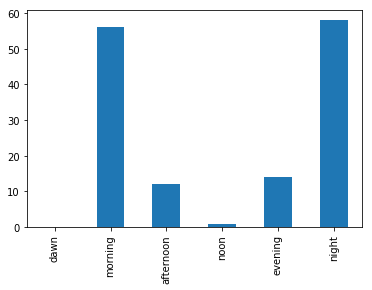

In [71]:
pd.Series(Counter(times))[['dawn', 'morning', 'afternoon', 'noon',
                           'evening', 'night']].plot(kind='bar')

We can also do this with "o'clock" times: 

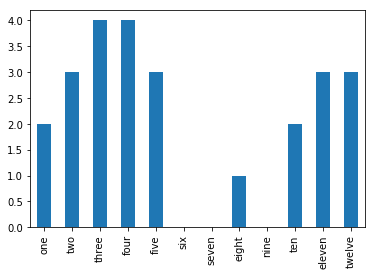

In [72]:
pd.Series(Counter(times))[['one', 'two', 'three', 'four', 'five', 'six',
                           'seven', 'eight', 'nine', 'ten', 'eleven',
                           'twelve']].plot(kind='bar')

And we can also see how frequently times and dates occur in narrative time. We could either do this the way we've learned, by turning it into a binary representation, and splitting it: 

In [ ]:
binary = np.array([1 if word.ent_type_ == 'TIME' else 0 for word in moonstoneDoc])
split = np.array_split(binary, 20)
pd.Series(split).sum().plot()

Or we could do this a slightly different way: 

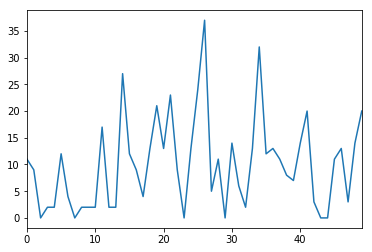

In [159]:
times = pd.Series(np.histogram([word.i for word in moonstoneDoc if word.ent_type_ == 'TIME'], bins=50)[0])
times.plot()

# More advanced stuff

Open your own dataset (replace the given file path with a path pointing to your own text).

In [17]:
with open('data/1895_shaw-george-bernard_you-never-can-tell.txt', 'r') as f:
    text = f.read()

# Vocab Diversity
Calculate the vocabulary diversity of the speakers in the data.

In [18]:
import re
from collections import defaultdict, Counter

def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

def extract_dialogues(text):
    # Simple pattern to match character names and their dialogues
    # This pattern might need to be adjusted based on the text's structure
    pattern = re.compile(r'^([A-Z]+):\s*(.*?)$', re.MULTILINE)
    dialogues = defaultdict(list)
    
    for match in pattern.findall(text):
        character, dialogue = match
        words = dialogue.split()
        dialogues[character].extend(words)
    
    return dialogues

def calculate_vocabulary_diversity(dialogues):
    diversity_scores = {}
    
    for character, words in dialogues.items():
        unique_words = set(words)
        total_words = len(words)
        diversity_scores[character] = len(unique_words) / total_words if total_words > 0 else 0
    
    return diversity_scores

dialogues = extract_dialogues(text)
diversity_scores = calculate_vocabulary_diversity(dialogues)

for character, score in diversity_scores.items():
    print(f'{character}: {score:.4f}')

PHILIP: 0.4790
VALENTINE: 0.3870
DOLLY: 0.5770
GLORIA: 0.4754
CRAMPTON: 0.4962
WAITER: 0.4792
SPEAKER: 0.4091
CLANDON: 1.0000
MOTHER: 1.0000
BOON: 0.7679
BOHUN: 0.6689
MCCOMAS: 1.0000


Calculate the top-used words by each character.

In [19]:
from nltk.corpus import stopwords
from collections import Counter

# Get English stopwords
stop_words = set(stopwords.words('english'))

def calculate_top_relative_word_frequencies_without_stopwords(dialogues, top_n=10):
    top_relative_frequencies = {}
    for character, words in dialogues.items():
        # Filter out stopwords
        filtered_words = [word for word in words if word.lower() not in stop_words]
        total_words = len(filtered_words)
        word_counts = Counter(filtered_words)
        # Calculate relative frequencies
        relative_frequencies = {word: count / total_words for word, count in word_counts.items()}
        # Sort words by their relative frequency in descending order and select the top N
        top_words = sorted(relative_frequencies.items(), key=lambda x: x[1], reverse=True)[:top_n]
        top_relative_frequencies[character] = top_words
    return top_relative_frequencies

# Assuming dialogues is your previously defined dictionary
top_relative_frequencies = calculate_top_relative_word_frequencies_without_stopwords(dialogues)

# Example of how to print the top 10 words for each character
for character, words in top_relative_frequencies.items():
    print(f"{character}:")
    for word, freq in words:
        print(f"  {word}: {freq:.4f}")
    print()


PHILIP:
  Mr.: 0.0189
  (He: 0.0103
  Sh!: 0.0086
  us: 0.0077
  Twentieth: 0.0069
  Century: 0.0060
  father,: 0.0060
  Mrs.: 0.0052
  you,: 0.0052
  man: 0.0052

VALENTINE:
  (He: 0.0082
  Oh,: 0.0078
  like: 0.0065
  I'm: 0.0065
  me.: 0.0065
  Well,: 0.0061
  you.: 0.0061
  one: 0.0052
  know: 0.0052
  old: 0.0052

DOLLY:
  Oh,: 0.0253
  old: 0.0142
  us: 0.0079
  like: 0.0079
  (She: 0.0079
  us.: 0.0079
  Twentieth: 0.0063
  Century: 0.0063
  sir.: 0.0063
  Phil:: 0.0047

GLORIA:
  Oh,: 0.0128
  (She: 0.0114
  Mr.: 0.0114
  away: 0.0085
  us: 0.0085
  right: 0.0071
  shall: 0.0071
  sits: 0.0071
  know: 0.0071
  things: 0.0071

CRAMPTON:
  I'm: 0.0116
  you.: 0.0090
  No,: 0.0077
  want: 0.0077
  (He: 0.0064
  Mr.: 0.0064
  it.: 0.0064
  me.: 0.0064
  Well,: 0.0052
  That's: 0.0052

WAITER:
  sir.: 0.0595
  sir,: 0.0231
  (He: 0.0170
  Yes,: 0.0146
  miss.: 0.0122
  sir?: 0.0085
  indeed,: 0.0085
  I'm: 0.0073
  put: 0.0073
  young: 0.0073

SPEAKER:
  DOLLY: 0.3182
  CRAMPTON: 0.

Find words typical of a character.

In [20]:
from nltk.corpus import stopwords

# Get English stopwords
stop_words = set(stopwords.words('english'))

def find_character_most_typical_of_word(dialogues, word, stop_words=set()):
    word_frequencies = {}
    for character, words in dialogues.items():
        # Filter out stopwords if needed
        filtered_words = [w for w in words if w.lower() not in stop_words]
        total_words = len(filtered_words)
        word_count = filtered_words.count(word)
        if total_words > 0:
            word_frequencies[character] = word_count / total_words
        else:
            word_frequencies[character] = 0

    # Find the character with the highest relative frequency for the given word
    if word_frequencies:
        most_typical_character = max(word_frequencies, key=word_frequencies.get)
        return most_typical_character, word_frequencies[most_typical_character]
    else:
        return None, 0

given_word = 'tea'  # EXAMPLE WORD - CHANGE THIS!
most_typical_character, frequency = find_character_most_typical_of_word(dialogues, given_word.lower(), stop_words)

if most_typical_character:
    print(f"The word '{given_word}' is most typical of {most_typical_character} with a relative frequency of {frequency:.4f}")
else:
    print(f"The word '{given_word}' is not typical of any character.")


The word 'tea' is most typical of PHILIP with a relative frequency of 0.0009


Responses: 
- who is addressed the most and who responds the most
- who initiates scenes—and how that varies across time

In [34]:
import re
from collections import defaultdict, Counter

# Initialize variables
scenes = 0
dialogue_counter = defaultdict(Counter)
current_speakers = set()
scene_initiation = defaultdict(int)

def process_line(line):
    global scenes
    # Check for scene transitions, simplistically assuming any line with "SCENE" might be one.
    if "SCENE" in line or "ACT" in line:
        scenes += 1
        current_speakers.clear()  # Clear current speakers for the new scene

    # Match character dialogues which typically follow the pattern "CHARACTER: dialogue"
    dialogue_match = re.match(r"(\w[\w\s]*):", line)
    if dialogue_match:
        speaker = dialogue_match.group(1).strip()
        
        # If this is the first speaker after a scene transition, they initiate the scene
        if scenes > 0 and len(current_speakers) == 0:
            scene_initiation[speaker] += 1
        
        # Update dialogue counts considering this speaker addresses all current speakers in the scene
        for other_speaker in current_speakers:
            if other_speaker != speaker:  # Ensure a speaker doesn't address themselves
                dialogue_counter[speaker][other_speaker] += 1
                dialogue_counter[other_speaker][speaker] += 1  # Assuming mutual interaction for simplicity
        
        current_speakers.add(speaker)

def analyze_text(text):
    for line in text.split("\n"):
        line = line.strip()
        process_line(line)

# Placeholder for reading the text; replace with actual file reading in practice
# text = "Your play script here"

analyze_text(text)

# Display results
print(f"Total Scenes: {scenes}")
print("\nScene Initiation Frequency:")
for character, count in scene_initiation.items():
    print(f"{character}: {count} scenes initiated")

print("\nWho is addressed the most:")
for speaker, addressees in dialogue_counter.items():
    print(f"{speaker} addressed: {dict(addressees)}")


Total Scenes: 7

Scene Initiation Frequency:
THE DENTIST: 1 scenes initiated
McCOMAS: 1 scenes initiated
GLORIA: 1 scenes initiated
BOON: 1 scenes initiated

Who is addressed the most:
THE YOUNG LADY addressed: {'THE DENTIST': 25, 'THE YOUNG GENTLEMAN': 6, 'PHILIP': 58, 'VALENTINE': 54, 'DOLLY': 57, 'THE PARLOR MAID': 5, 'GLORIA': 10, 'CRAMPTON': 28}
THE DENTIST addressed: {'THE YOUNG LADY': 25, 'THE YOUNG GENTLEMAN': 2, 'PHILIP': 56, 'VALENTINE': 54, 'DOLLY': 57, 'THE PARLOR MAID': 5, 'GLORIA': 10, 'CRAMPTON': 28}
THE YOUNG GENTLEMAN addressed: {'THE YOUNG LADY': 6, 'THE DENTIST': 2, 'PHILIP': 56, 'VALENTINE': 54, 'DOLLY': 57, 'THE PARLOR MAID': 5, 'GLORIA': 10, 'CRAMPTON': 28}
PHILIP addressed: {'THE YOUNG GENTLEMAN': 56, 'THE YOUNG LADY': 58, 'THE DENTIST': 56, 'VALENTINE': 218, 'DOLLY': 216, 'THE PARLOR MAID': 30, 'GLORIA': 138, 'CRAMPTON': 92, 'Finch': 39, 'McCOMAS': 96, 'WAITER': 82, 'SPEAKER': 23, 'CLANDON': 4, 'MOTHER': 4, 'MCCOMAS': 7, 'BOON': 7, 'BOHUN': 14}
VALENTINE address